- Structural Design Patterns are solutions that focus on how classes and objects are organzied to form larger, functional structures. These patterns help developers simplify relationships between objects, making code more efficient, flexible and easy to maintain. 

# 1. Adapter Design Pattern
- Allows incompatible interfaces to work together by converting the interface of one class into another that the client expects.
- It is useful in
    - We're integrating with a legacy system or a third party library that doesn't match our current interface.
    - We want to reuse exisiting functionality without modifying its source code.
    - We need to bridge the gap between new and old code, or between system built with different iterface designs.
- Solves this by introducing a wrapper class that sits between our system and the incompatible component. It translates calls from our interface into calls the legacy or third party system understands without changing either side.

### Problem: Incompatible Payment Interfacces
- Building the checkout component of an e-commerce application.
- Our checkout service is designed to work with a Payment Interface for handling payments.

In [8]:
import time

class PaymentProcessor:
    def process_payment(self, amount, currency):
        raise NotImplementedError

    def is_payment_successful(self):
        raise NotImplementedError

    def get_transaction_id(self):
        raise NotImplementedError

# This abstraction makes it easy to swap payment providers without changing any code business logic.

class InHousePaymentProcessor(PaymentProcessor):
    def __init__(self):
        self.transaction_id = None
        self.is_payment_successful_flag = False

    def process_payment(self, amount, currency):
        print(f"InHousePaymentProcessor: Processor payment of {amount} {currency}")
        self.transaction_id = f"TXN_{int(time.time() * 1000)}"
        self.is_payment_successful_flag = True
        print(f"InHousePaymentProcessor: Payment successful. Txn ID: {self.transaction_id}")

    def is_payment_successful(self):
        return self.is_payment_successful_flag

    def get_transaction_id(self):
        return self.transaction_id

# Our Checkout Service uses this interface and wrks beautifully with the in-house payment processor
class CheckoutService:
    def __init__(self, payment_processor):
        self.payment_processor = payment_processor

    def checkout(self, amount, currency):
        print(f"CheckoutSErvice: Attempting to process order for ${amount} {currency}")
        self.payment_processor.process_payment(amount, currency)
        if self.payment_processor.is_payment_successful():
            print(f"CheckoutService: Order successful! Transaction ID: {self.payment_processor.get_transaction_id()}")
        else:
            print("CheckoutService: Order failed. Payment was not successful.")

# Here's how it gets called from the main e-commerce application
class ECommerceAppV1:
    @staticmethod
    def main():
        processor = InHousePaymentProcessor()
        checkout = CheckoutService(processor)
        checkout.checkout(199.99, "USD")

if __name__ == "__main__":
   ECommerceAppV1.main()

CheckoutSErvice: Attempting to process order for $199.99 USD
InHousePaymentProcessor: Processor payment of 199.99 USD
InHousePaymentProcessor: Payment successful. Txn ID: TXN_1760323923352
CheckoutService: Order successful! Transaction ID: TXN_1760323923352


In [5]:
# Now, integrate with a legacy third-party payment provider, widely used and battle-tested, but with different interface.

class LegacyGateway:
   def __init__(self):
       self.transaction_reference = None
       self.is_payment_successful_flag = False

   def execute_transaction(self, total_amount, currency):
       print(f"LegacyGateway: Executing transaction for {currency} {total_amount}")
       self.transaction_reference = time.time_ns()
       self.is_payment_successful_flag = True
       print(f"LegacyGateway: Transaction executed successfully. Txn ID: {self.transaction_reference}")

   def check_status(self, transaction_reference):
       print(f"LegacyGateway: Checking status for ref: {transaction_reference}")
       return self.is_payment_successful_flag

   def get_reference_number(self):
       return self.transaction_reference

- we now have 2 incompatiblel interfaces. Our exisiting CheckoutService expects a PaymentProcessor. But LegacyGateway does not implement it and it;s method and signatures don't match.
- What we need is a translator -  a class that sits between checkoutServcie and LegacyGateway, adapting the incompatible interface into one that works with our system.

### Adapter Pattern
- Adapter acts as a bridge between an incompatible interface and what the client actually expects.
- Our applicaton expects one interface (PaymentProcessor), but the legacy system provides another (LegacyGateway). The adapter allows the two to work together without altering either side.
- Types of adapters
    1. Object Adapter
        - Uses composition: the adapter holds a reference to the adaptee
        - Allows flexibility and reuse across class hierarchies.
    2. Class Adapter
        - Uses inheritance: the adapter inherits from both the target interface and the adaptee.
        - Requires multiple inheritance, which java doesn't support for classes
- 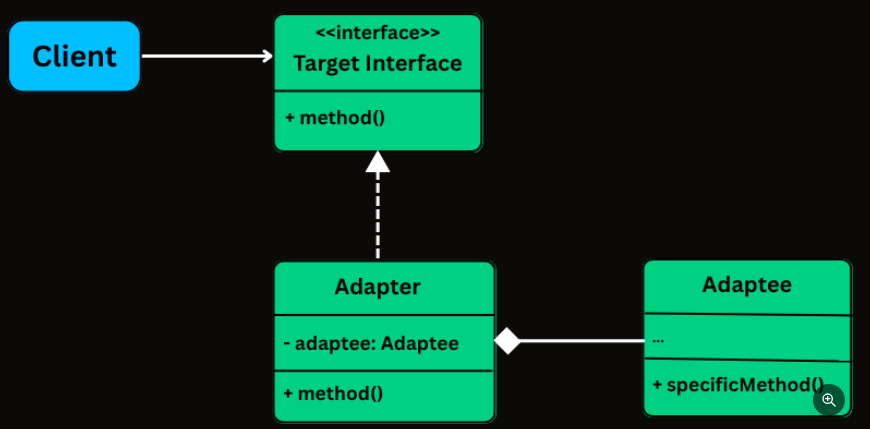

- Example: Real-world
- Charger: Our application (CheckoutService)
- Wall socket: Third party (LegacyGateway)
- Travel plug adapter: Adapter class (LegacyGatewayAdapter)

### Adapter

In [11]:
class PaymentProcessor:
    def process_payment(self, amount, currency):
        raise NotImplementedError

    def is_payment_successful(self):
        raise NotImplementedError

    def get_transaction_id(self):
        raise NotImplementedError

# This abstraction makes it easy to swap payment providers without changing any code business logic.
class InHousePaymentProcessor(PaymentProcessor):
    def __init__(self):
        self.transaction_id = None
        self.is_payment_successful_flag = False

    def process_payment(self, amount, currency):
        print(f"InHousePaymentProcessor: Processor payment of {amount} {currency}")
        self.transaction_id = f"TXN_{int(time.time() * 1000)}"
        self.is_payment_successful_flag = True
        print(f"InHousePaymentProcessor: Payment successful. Txn ID: {self.transaction_id}")

    def is_payment_successful(self):
        return self.is_payment_successful_flag

    def get_transaction_id(self):
        return self.transaction_id

# Our Checkout Service uses this interface and wrks beautifully with the in-house payment processor
class CheckoutService:
    def __init__(self, payment_processor):
        self.payment_processor = payment_processor

    def checkout(self, amount, currency):
        print(f"CheckoutSErvice: Attempting to process order for ${amount} {currency}")
        self.payment_processor.process_payment(amount, currency)
        if self.payment_processor.is_payment_successful():
            print(f"CheckoutService: Order successful! Transaction ID: {self.payment_processor.get_transaction_id()}")
        else:
            print("CheckoutService: Order failed. Payment was not successful.")


# Now, integrate with a legacy third-party payment provider, widely used and battle-tested, but with different interface.
class LegacyGateway:
   def __init__(self):
       self.transaction_reference = None
       self.is_payment_successful_flag = False

   def execute_transaction(self, total_amount, currency):
       print(f"LegacyGateway: Executing transaction for {currency} {total_amount}")
       self.transaction_reference = time.time_ns()
       self.is_payment_successful_flag = True
       print(f"LegacyGateway: Transaction executed successfully. Txn ID: {self.transaction_reference}")

   def check_status(self, transaction_reference):
       print(f"LegacyGateway: Checking status for ref: {transaction_reference}")
       return self.is_payment_successful_flag

   def get_reference_number(self):
       return self.transaction_reference

# Adapter
class LegacyGatewayAdapter(PaymentProcessor):
    def __init__(self, legacy_gateway):
        self.legacy_gateway = legacy_gateway
        self.current_ref = None

    def process_payment(self, amount, currency):
        print(f"Adapter: Translating processPayment() for {amount} {currency}")
        self.legacy_gateway.execute_transaction(amount, currency)
        self.current_ref = self.legacy_gateway.get_reference_number()

    def is_payment_successful(self):
        return self.legacy_gateway.check_status(self.current_ref)

    def get_transaction_id(self):
        return f"LEGACY_TXN_{self.current_ref}"

# Client Code
class ECommerceAppV2:
    @staticmethod
    def main():
        # Modern processor
        processor = InHousePaymentProcessor()
        modern_checkout = CheckoutService(processor)
        print("----Using Modern Processor-----")
        modern_checkout.checkout(199.99, "USD")

        # Legacy gateway through adapter
        print("\n--- Using Legacy Gateway via Adapter ---")
        legacy = LegacyGateway()
        processor = LegacyGatewayAdapter(legacy)
        legacy_checkout = CheckoutService(processor)
        legacy_checkout.checkout(75.50, "EURO")

if __name__ == "__main__":
   ECommerceAppV2.main()

----Using Modern Processor-----
CheckoutSErvice: Attempting to process order for $199.99 USD
InHousePaymentProcessor: Processor payment of 199.99 USD
InHousePaymentProcessor: Payment successful. Txn ID: TXN_1760324114390
CheckoutService: Order successful! Transaction ID: TXN_1760324114390

--- Using Legacy Gateway via Adapter ---
CheckoutSErvice: Attempting to process order for $75.5 EURO
Adapter: Translating processPayment() for 75.5 EURO
LegacyGateway: Executing transaction for EURO 75.5
LegacyGateway: Transaction executed successfully. Txn ID: 1760324114390584100
LegacyGateway: Checking status for ref: 1760324114390584100
CheckoutService: Order successful! Transaction ID: LEGACY_TXN_1760324114390584100


# 2. Decorator Design Pattern
- Lets us dynamically add new behavuor or responsibilites to objects without modifying their underlying code.
- Its used in
    - We want to extend the fucntionality of a class without subclassing it
    - We need to compose behaviors at runtime, in various combinations
    - We want to avoid bloated classes filled with if-else logic for optional features.

### Problem: Adding Features to a Text Renderer
- We're building a rich text rendering system like a simple word processor or a markdown preview tool. At the core of our system is a TextView component that renders plain text on screen.
- Soon, product requirements evolve:
    - We need to support bold text
    - Then italic text
    - Then underlined text
    - Then scrollable and bordered text containers
    - And possibility combinations of those (bold + italic + underlined)

#### Naive Approch: subclassing for Every Combination

In [12]:
from abc import ABC, abstractmethod
class TextView(ABC):
    @abstractmethod
    def render(self):
        pass

class BoldTextView(TextView):
    def render(self):
        print("Rendering bold text", end="")

class ItalicTextView(TextView):
    def render(self):
        print("Rendering italix text", end="")

class BoldItalicTextView(TextView):
    def render(self):
        print("Rendering bold + italic text", end="")

- Why this approach quicky falls apart
    - Class Explosion: For every new combination of features, we need to create a new subclass
    - Rigid Design: Can't dynamically change features at runtime.
    - Violates the Open/Closed principle

#### Decorator Pattern
- Allwos us to add responsibilites to object dynamically, without altering their structure or modiying their original code.
- At its core, the pattern relies on wrapping an object inside another object (decorator) that implements the same interface and adds new behavior before or after delegating to the wrapped object.
- This created a layered effect, where decorators can be stacked to apply multiple enchacements without creating a complex inheritance tree.
- 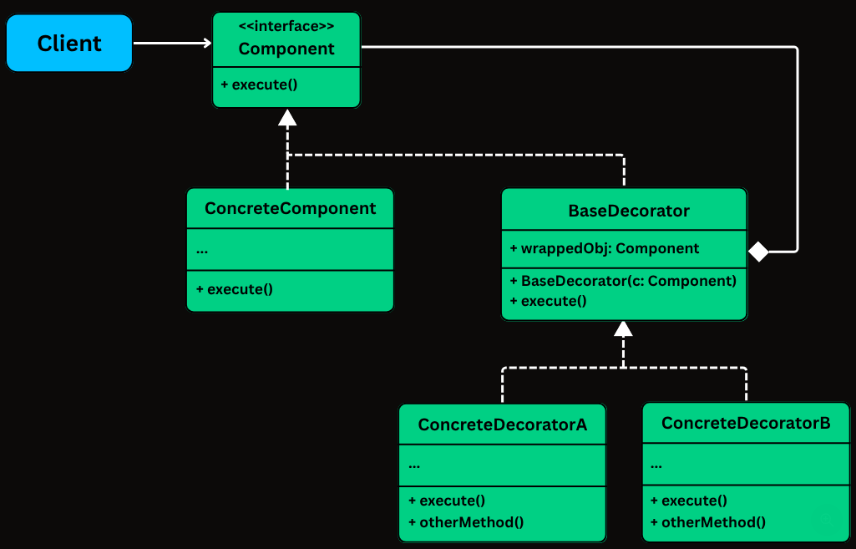

- Real Word analogy
    - Think of a plain cofferr. Now add milk. Now add sugar
    - Each addition enhances the original but doesn't change the base. The Decorator pattern works the same way - Stacking behaviors while keeping the core intact.

#### Decorator Pattern

In [19]:
from abc import ABC, abstractmethod

# Component Interface: Used by both base component and all decorators
class TextView(ABC):
    @abstractmethod
    def render(self):
        pass

# Concrete Component
class PlainTextView(TextView):
    def __init__(self, text):
        self.text = text

    def render(self):
        print(self.text, end="")

# Abstract Decorator
class TextDecorator(TextView):
    def __init__(self, inner):
        self.inner = inner

# concrete Decorators
class BoldDecorator(TextDecorator):
    def __init__(self, inner):
        super().__init__(inner)

    def render(self):
        print("<b>", end="")
        self.inner.render()
        print("</b>", end="")

class BoldDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<b>", end="")
       self.inner.render()
       print("</b>", end="")

class ItalicDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<i>", end="")
       self.inner.render()
       print("</i>", end="")

class UnderlineDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<u>", end="")
       self.inner.render()
       print("</u>", end="")

# Compose Decorators in Client
class TextRendererApp:
    @staticmethod
    def main():
        text = PlainTextView("Hello, World!")

        print("Plain: ", end="")
        text.render()

        print("Bold: ", end="")
        bold_text = BoldDecorator(text)
        bold_text.render()
        print()

        print("Italic + Underline: ", end="")
        italic_underline = UnderlineDecorator(ItalicDecorator(text))
        italic_underline.render()
        print()

        print("Bold + Italic + Underline: ", end="")
        all_styles = UnderlineDecorator(ItalicDecorator(BoldDecorator(text)))
        all_styles.render()
        print()

if __name__ == "__main__":
   TextRendererApp.main()

Plain: Hello, World!Bold: <b>Hello, World!</b>
Italic + Underline: <u><i>Hello, World!</i></u>
Bold + Italic + Underline: <u><i><b>Hello, World!</b></i></u>
